<a href="https://colab.research.google.com/github/DanMazerolle/SAGE-2024/blob/main/MATH2030_Project2LiveClass1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import matplotlib.pyplot as plt

### Task 1: Plot the solution

In [43]:
p = np.linspace(0, np.pi, 100)

# Single bowl
a = 0.499

# Double bowl
a = 0.501

L = lambda p: np.sin(2*p) + a*np.sin(4*p)

In [44]:
# Initial guess for the optimizer
p0 = 0.75

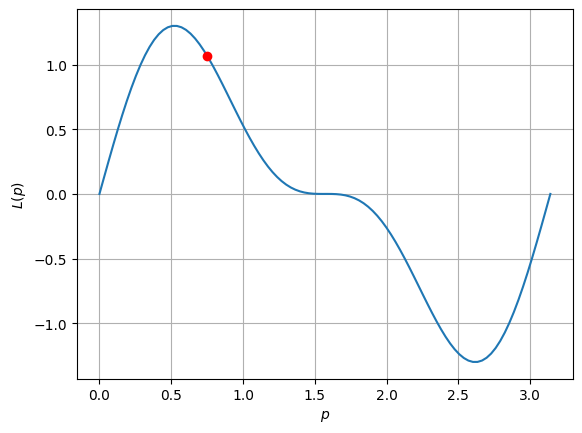

In [45]:
plt.plot(p, L(p))
plt.plot(p0,L(p0),'ro')
plt.xlabel('$p$')
plt.ylabel('$L(p)$')
plt.grid()

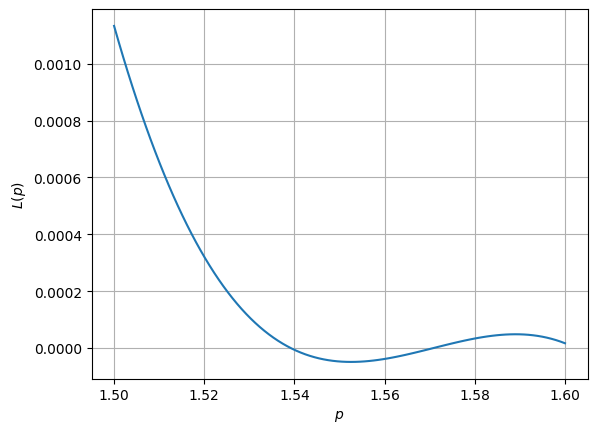

In [46]:
# Zoom into the solution
p = np.linspace(1.5, 1.6, 100)
plt.plot(p, L(p))
plt.xlabel('$p$')
plt.ylabel('$L(p)$')
plt.grid()

### Task 2: Implement vanilla gradient descent

In [47]:
# We need the gradient for the optimizer
Lprime = lambda p: 2*np.cos(2*p) + 4*a*np.cos(4*p)

# Using JAX
# import jax.numpy as jnp
# import jax
# jax.config.update("jax_enable_x64", True)
# L = lambda p: jnp.sin(2*p) + a*jnp.sin(4*p)
# Lprime = jax.grad(L)

In [48]:
# Learning rate
eta = 0.01

# Target error
targetErr = 1e-13

In [49]:
# Optimizers
def gradientDescent(p0, gradL):
  return p0 - eta*gradL(p0)

def momentumSGD(p0, gradL, m, beta = 0.9, nesterov=0):
  m = beta*m - eta*gradL(p0 + nesterov * beta * m)
  p0 = p0 + m
  return p0, m

In [50]:
# SGD
currErr = targetErr + 0.01
steps = 0

p0 = 0.75

while currErr > targetErr:  # Note: Here you could also constrain the maximum number of steps
  p1 = gradientDescent(p0, Lprime)
  currErr = np.abs(L(p1)-L(p0))
  p0 = p1
  steps += 1

print(f'Minimum found p = {p0:2.8f} in {steps} steps.')

Minimum found p = 1.55255098 in 1946 steps.


### Task 3: Plot to verify that the correct minimum was found

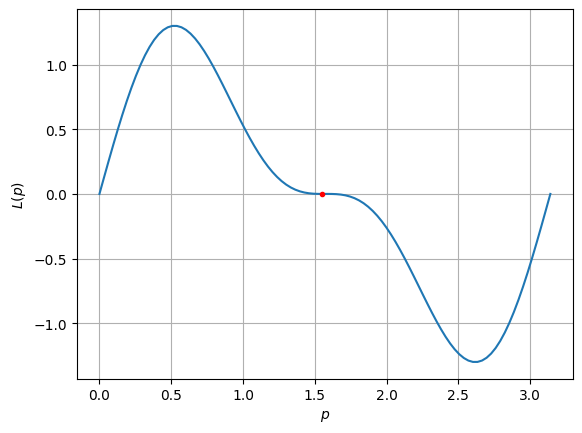

In [51]:
p = np.linspace(0, np.pi, 100)
plt.plot(p, L(p))
plt.plot(p0, L(p0),'r.')
plt.xlabel('$p$')
plt.ylabel('$L(p)$')
plt.grid()

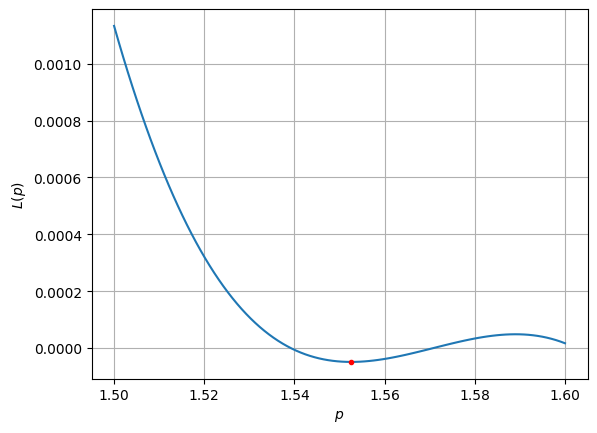

In [52]:
# Zoom into the solution
p = np.linspace(1.5, 1.6, 100)
plt.plot(p, L(p))
plt.plot(p0, L(p0),'r.')
plt.xlabel('$p$')
plt.ylabel('$L(p)$')
plt.grid()

### Task 4: Implement the remaining optimizers

In [53]:
#momentum sgt
currErr = 1
steps = 0

p0 =0.75

#initial momentum
m = 0.0

while currErr > targetErr:
  p1, m = momentumSGD(p0, Lprime, m)

  currErr = np.abs(L(p1)-L(p0))
  p0 = p1
  steps += 1

print(f'Minimum found x = {p0} in {steps} steps.')

Minimum found x = 2.618186157264386 in 272 steps.


In [54]:
plt.figure(figsize=(8, 5))
plt.plot(step_values, p_values, marker='o', linestyle='-')
plt.xlabel('Iteration Step')
plt.ylabel('Parameter Value (p0)')
plt.title('Momentum SGD Progress')
plt.grid()
plt.show()

NameError: name 'step_values' is not defined

<Figure size 800x500 with 0 Axes>